# Analysis of sold new cars in Estonia 2022

Data is taken from official source - https://www.transpordiamet.ee/soidukitega-tehtud-toimingute-statistika

Period - from 01.2022 till 12.2022.

Only new cars where used in this analysis.


# Findings
1. 20561 cars were sold for this period.
2. ~44% petrol, ~31% hybrid cars, ~16% diesel...
3. ~27% has engine capacity of ~2.0 liters, ~22% ~1.5 liters, ~10% ~1.0 liters...
4. Most popular brands/marks in Estonia: TOYOTA, SKODA, VOLKSWAGEN, KIA, AUDI...
5. ~49% of all cars are SUVs
6. Corporate clients and private clients buy similair cars(ex. Toyota Rav4)
7. People from different cities buy different cars.
8. Most popular car in Estonia: TOYOTA RAV4

In [119]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [120]:
from mnt_sum import get_summary
df_o = get_summary('data/2022')
df_o.describe()

,Esm reg aasta,Mootori võimsus,Mootori maht,CO2_NEDC,CO2_WLTP,Istekohti,Telgi kokku,Registrimass,Tühimass,Täismass,Arv
count,17304.0,17304.000000,17304.000000,7548.000000,16809.000000,17304.000000,17304.0,17304.000000,17304.000000,17304.000000,17304.000000
mean,2022.0,122.204363,1733.478907,130.481055,149.218157,5.183079,2.0,2157.930767,1685.153491,2157.932212,1.188222
std,0.0,59.227172,693.411253,45.773841,45.614287,0.753424,0.0,443.622466,386.027327,443.621194,1.188376
min,2022.0,18.600000,0.000000,0.000000,0.000000,2.000000,2.0,1039.000000,699.000000,1039.000000,1.000000
25%,2022.0,92.000000,1482.000000,109.000000,129.000000,5.000000,2.0,1860.000000,1434.000000,1860.000000,1.000000
50%,2022.0,110.000000,1598.000000,123.000000,142.000000,5.000000,2.0,2070.000000,1599.000000,2070.000000,1.000000
75%,2022.0,132.000000,1987.000000,150.000000,163.000000,5.000000,2.0,2320.000000,1805.000000,2320.000000,1.000000
max,2022.0,585.000000,6749.000000,456.000000,442.000000,9.000000,2.0,15000.000000,10030.000000,15000.000000,55.000000


In [121]:
df_o.head()

,Kategooria,Mark,Mudel,Keretüüp,Esm reg aasta,Mootori tüüp,Mootori võimsus,Mootori maht,Heitmenorm,Hübriidi tüüp,...,Tühimass,Täismass,Värv,Maakond,Linn,Tüüp,Arv,Kere nimetus,Käigukasti tüüp,Kütusekombinatsioon
101,M1,ALPINA,BMW ALPINA D5 S ALLRAD,SEDAAN,2022,DIISEL,300.0,2993,EURO6,<NA>,...,2068,2525,HALL,HARJU MAAKOND,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>
102,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2022,BENSIIN_KATALYSAATOR,70.0,999,EURO 6 AP,<NA>,...,1184,1630,VALGE,HARJU MAAKOND,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>
103,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2022,BENSIIN_KATALYSAATOR,70.0,999,EURO 6 AP,<NA>,...,1186,1630,VALGE,HARJU MAAKOND,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>
104,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2022,BENSIIN_KATALYSAATOR,70.0,999,EURO 6 AP,<NA>,...,1200,1630,VALGE,HARJU MAAKOND,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>
105,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2022,BENSIIN_KATALYSAATOR,81.0,999,EURO 6 AP,<NA>,...,1276,1680,PUNANE,HARJU MAAKOND,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>


In [122]:
df = df_o[['Mark', 'Mudel', 'Mootori tüüp', 'Mootori maht', 'Mootori võimsus',
       'Linn', 'Tüüp', 'Arv']]

df.head()

,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv
101,ALPINA,BMW ALPINA D5 S ALLRAD,DIISEL,2993,300.0,Tallinn,Juriidiline,1
102,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,Juriidiline,1
103,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,Juriidiline,1
104,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,Juriidiline,1
105,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,81.0,Tallinn,Juriidiline,1


# Adding additional data

In [123]:
df['model'] = df['Mark'] + ' ' + df['Mudel']
df.head()

/tmp/ipykernel_228467/2682016276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['Mark'] + ' ' + df['Mudel']


,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model
101,ALPINA,BMW ALPINA D5 S ALLRAD,DIISEL,2993,300.0,Tallinn,Juriidiline,1,ALPINA BMW ALPINA D5 S ALLRAD
102,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK
103,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK
104,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK
105,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,81.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK


In [124]:
import yaml
from utils.file import read_file

SUVS = set(yaml.safe_load(read_file("data/suvs.yaml").lower()))

df['SUV'] = df['model'].str.lower().isin(SUVS)
df[df['SUV']].sample(5)

/tmp/ipykernel_228467/303451227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUV'] = df['model'].str.lower().isin(SUVS)


,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model,SUV
337,AUDI,Q3,DIISEL,1968,110.0,Tallinn,Juriidiline,8,AUDI Q3,True
319,HONDA,CR-V,BENSIIN_HYBRIID,1993,107.0,Tartu linn,Füüsiline,1,HONDA CR-V,True
1685,VOLVO,XC90,BENSIIN_HYBRIID,1969,228.0,Määramata,Füüsiline,1,VOLVO XC90,True
497,HYUNDAI,BAYON,BENSIIN_KATALYSAATOR,998,73.5,Tallinn,Füüsiline,1,HYUNDAI BAYON,True
1849,VOLKSWAGEN,TIGUAN,BENSIIN_KATALYSAATOR,1498,110.0,Tallinn,Füüsiline,1,VOLKSWAGEN TIGUAN,True


In [125]:
from decimal import *

def round(number, digit=0):
    return float(Decimal(number).quantize(Decimal(str(1/10**digit)), ROUND_HALF_UP))

df['full model'] = df['Mark'] + ' ' + df['Mudel'] + '(' \
              + df['Mootori tüüp'].map(lambda x: x.replace('kat.', '').strip()).map(str) + ', ' \
              + df['Mootori maht'].map(lambda x: round(x / 1000, 1)).map(str) + ' cm3, ' \
              + df['Mootori võimsus'].map(lambda x: int(x)).map(str) + ' kW)'
df.head()

/tmp/ipykernel_228467/3185011425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full model'] = df['Mark'] + ' ' + df['Mudel'] + '(' \


,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model,SUV,full model
101,ALPINA,BMW ALPINA D5 S ALLRAD,DIISEL,2993,300.0,Tallinn,Juriidiline,1,ALPINA BMW ALPINA D5 S ALLRAD,False,"ALPINA BMW ALPINA D5 S ALLRAD(DIISEL, 3.0 cm3,..."
102,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK,False,"AUDI A1 SPORTBACK(BENSIIN_KATALYSAATOR, 1.0 cm..."
103,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK,False,"AUDI A1 SPORTBACK(BENSIIN_KATALYSAATOR, 1.0 cm..."
104,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,70.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK,False,"AUDI A1 SPORTBACK(BENSIIN_KATALYSAATOR, 1.0 cm..."
105,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,81.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK,False,"AUDI A1 SPORTBACK(BENSIIN_KATALYSAATOR, 1.0 cm..."


# Total sold cars

In [126]:
df['Arv'].sum()

20561

# Popular fuels

                       Arv
Mootori tüüp              
BENSIIN_KATALYSAATOR  9007
BENSIIN_HYBRIID       6295
DIISEL                3336
DIISEL_HYBRIID         920
ELEKTER                693
CNG                    285
BENSIIN                 25


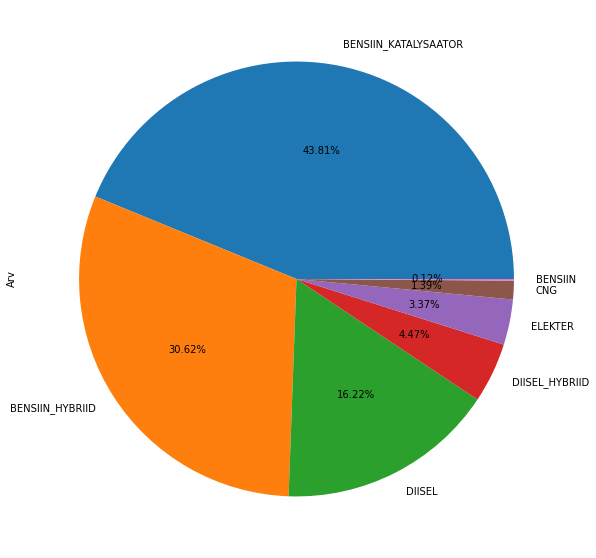

In [127]:
def show_pie(dataframe, groupby, index = None):
    plt.figure(figsize=(10, 10))
    dataframe = dataframe.groupby(
        [groupby], 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe['Arv'].plot.pie(autopct='%1.2f%%')
    print(dataframe)

show_pie(df, 'Mootori tüüp')

# Engine capacities

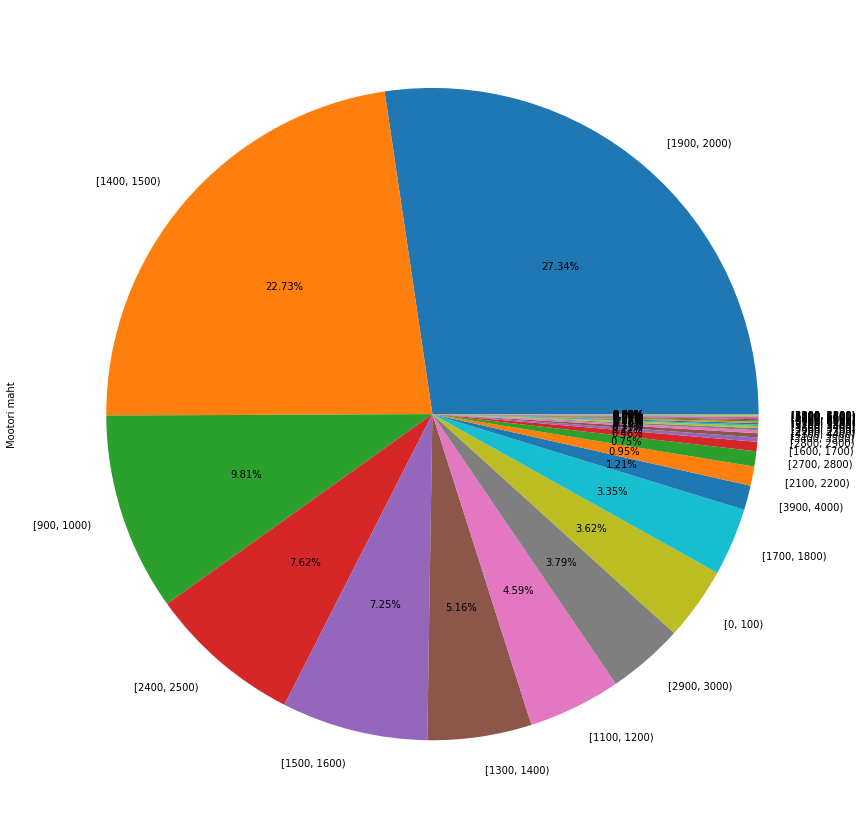

In [128]:
plt.figure(figsize=(15, 15))

bins = range(df['Mootori maht'].min(), df['Mootori maht'].max() + 100, 100)
capacities = pd.cut(df['Mootori maht'], bins, right=False).value_counts()
capacities.plot(kind='pie', autopct='%1.2f%%')
pass

# Top 10 popular manufacturers

Two charts might be displayed:
* 'model' - data is grouped by mark and model
* 'full model' - data is grouped by mark, model and engine

             Mark   Arv
1          TOYOTA  4456
2           SKODA  2769
3             KIA  1636
4      VOLKSWAGEN  1595
5            AUDI  1000
6         PEUGEOT   816
7         RENAULT   784
8   MERCEDES-BENZ   746
9           DACIA   725
10        HYUNDAI   681


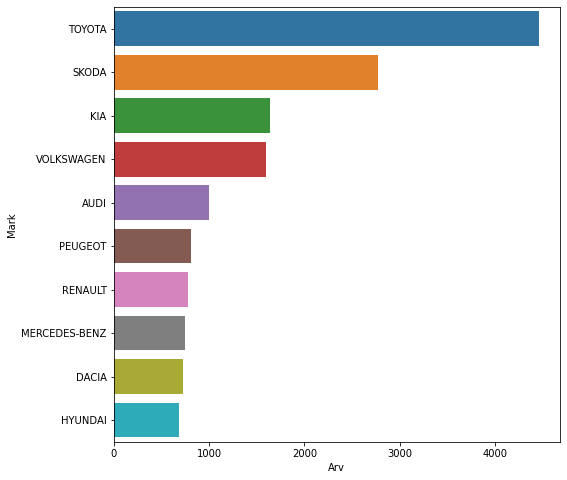

In [129]:
LIMIT = 10

def group_and_sort(data_frame, selection):
    return data_frame.groupby(
        selection, 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)

def group_sort_and_plot(data_frame, selection, x='Arv', y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1 
    y = selection[0] if y is None else y
    if plot:
        plt.figure(figsize=(8, 8))
        sns.barplot(x=x, y=y, data=data[:limit], orient='h')
    print(data.head(limit))
    
group_sort_and_plot(df, ['Mark'])

## Top 10 popular car models

                 model   Arv
1          TOYOTA RAV4  1526
2       TOYOTA COROLLA   966
3        SKODA OCTAVIA   807
4         SKODA KODIAQ   691
5         KIA SPORTAGE   641
6             KIA CEED   512
7   TOYOTA YARIS CROSS   498
8          TOYOTA C-HR   451
9    VOLKSWAGEN TIGUAN   369
10        DACIA DUSTER   347


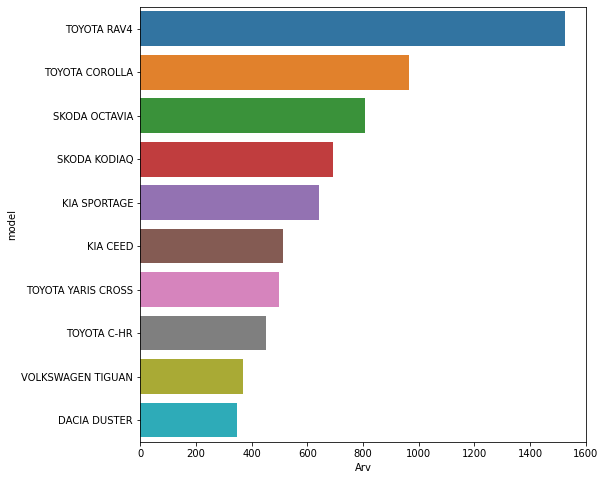

In [130]:
group_sort_and_plot(df, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  777
2       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  703
3     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  523
4        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  408
5      KIA SPORTAGE(BENSIIN_HYBRIID, 1.6 cm3, 132 kW)  318
6   SUBARU OUTBACK(BENSIIN_KATALYSAATOR, 2.5 cm3, ...  314
7   VOLKSWAGEN T-ROC(BENSIIN_KATALYSAATOR, 1.5 cm3...  290
8   TOYOTA YARIS CROSS(BENSIIN_HYBRIID, 1.5 cm3, 6...  287
9               SKODA KODIAQ(DIISEL, 2.0 cm3, 110 kW)  282
10  VOLKSWAGEN T-CROSS(BENSIIN_KATALYSAATOR, 1.0 c...  279


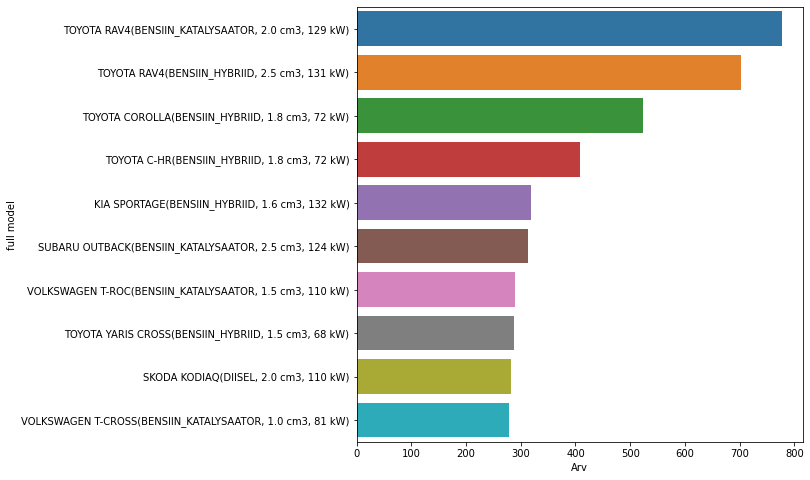

In [131]:
group_sort_and_plot(df, ['full model'])

### Top 10 popular diesel models

                               model  Arv
1                       SKODA KODIAQ  358
2                      SKODA OCTAVIA  268
3                      TOYOTA PROACE  171
4   TOYOTA LAND CRUISER (150 SERIES)  144
5             MERCEDES-BENZ V-KLASSE  131
6                  AUDI Q3 SPORTBACK  130
7                       DACIA DUSTER  127
8                       PEUGEOT 5008  123
9                       PEUGEOT 2008   99
10                      PEUGEOT 3008   97


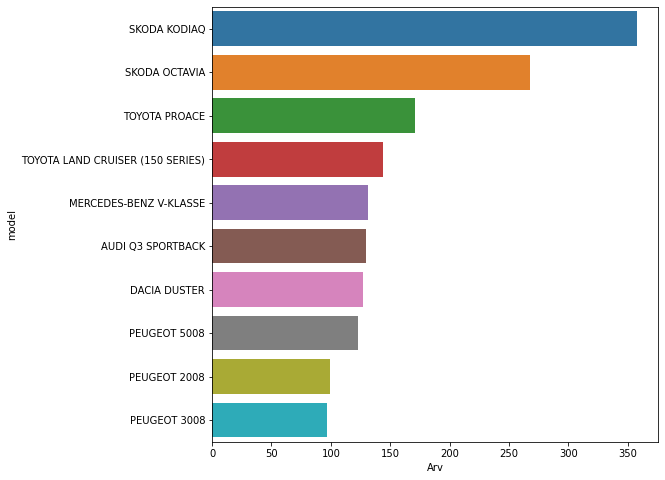

In [132]:
df_diesel = df[df['Mootori tüüp'] == 'DIISEL']

group_sort_and_plot(df_diesel, ['model'])

                                           full model  Arv
1               SKODA KODIAQ(DIISEL, 2.0 cm3, 110 kW)  282
2               SKODA OCTAVIA(DIISEL, 2.0 cm3, 85 kW)  150
3   TOYOTA LAND CRUISER (150 SERIES)(DIISEL, 2.8 c...  144
4          AUDI Q3 SPORTBACK(DIISEL, 2.0 cm3, 110 kW)  130
5              SKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)  115
6                PEUGEOT 5008(DIISEL, 1.5 cm3, 96 kW)  110
7              TOYOTA PROACE(DIISEL, 2.0 cm3, 106 kW)  100
8                DACIA DUSTER(DIISEL, 1.5 cm3, 84 kW)   99
9                PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)   97
10    MERCEDES-BENZ V-KLASSE(DIISEL, 1.9 cm3, 174 kW)   93


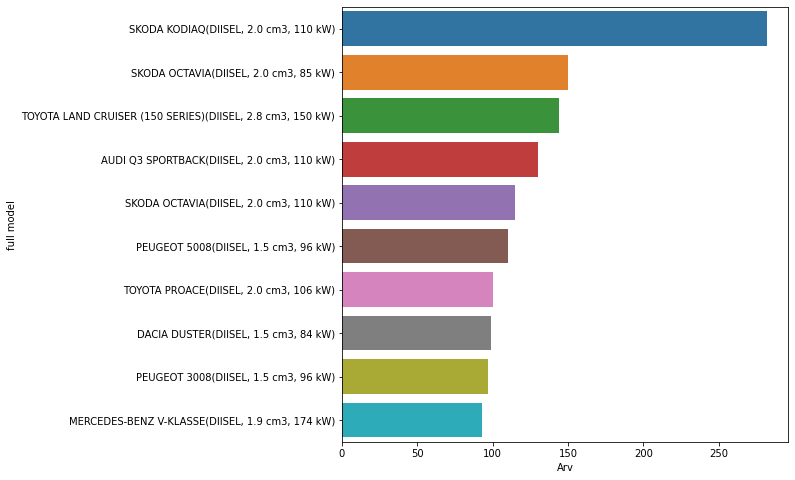

In [133]:
group_sort_and_plot(df_diesel, ['full model'])

### Top 10 popular petrol models

                 model  Arv
1          TOYOTA RAV4  777
2             KIA CEED  473
3       TOYOTA COROLLA  353
4   VOLKSWAGEN T-CROSS  339
5         SKODA KODIAQ  333
6       SUBARU OUTBACK  314
7     VOLKSWAGEN T-ROC  294
8    VOLKSWAGEN TIGUAN  249
9              AUDI Q2  227
10        DACIA DUSTER  220


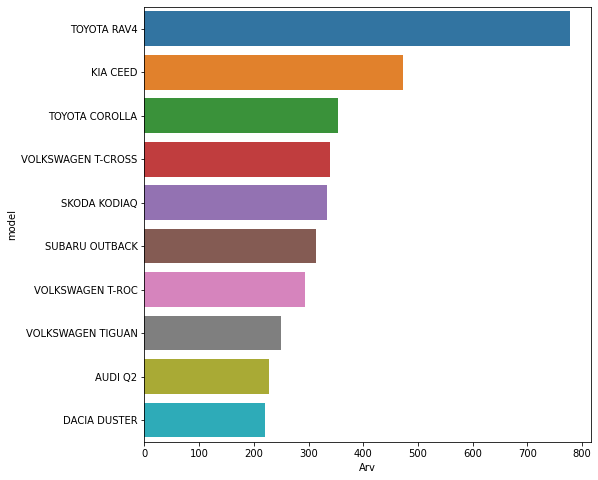

In [134]:
df_petrol = df[df['Mootori tüüp'].isin(['BENSIIN_KATALYSAATOR', 'BENSIIN'])]

group_sort_and_plot(df_petrol, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  777
2   SUBARU OUTBACK(BENSIIN_KATALYSAATOR, 2.5 cm3, ...  314
3   VOLKSWAGEN T-ROC(BENSIIN_KATALYSAATOR, 1.5 cm3...  290
4   VOLKSWAGEN T-CROSS(BENSIIN_KATALYSAATOR, 1.0 c...  279
5     KIA CEED(BENSIIN_KATALYSAATOR, 1.5 cm3, 118 kW)  237
6      AUDI Q2(BENSIIN_KATALYSAATOR, 1.5 cm3, 110 kW)  227
7   TOYOTA YARIS CROSS(BENSIIN_KATALYSAATOR, 1.5 c...  211
8   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.5 cm3, ...  199
9   SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...  196
10  DACIA SANDERO(BENSIIN_KATALYSAATOR, 1.0 cm3, 6...  194


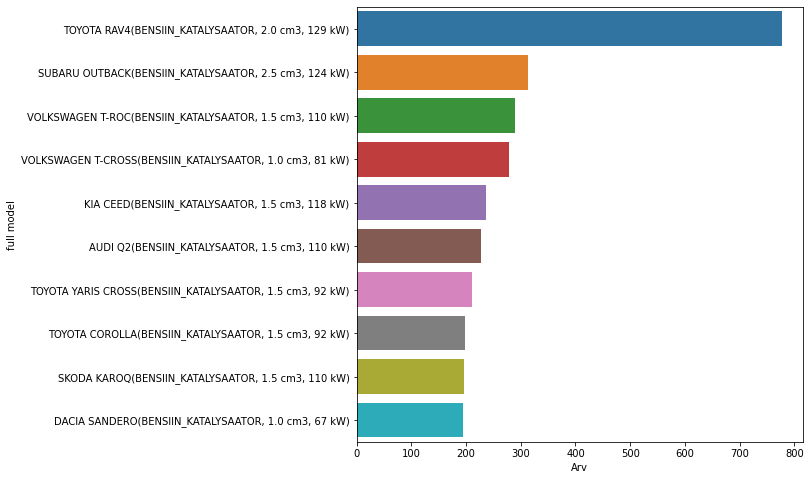

In [135]:
group_sort_and_plot(df_petrol, ['full model'])

### Top 10 popular hybrid models(diesel and petrol)


                 model  Arv
1          TOYOTA RAV4  749
2       TOYOTA COROLLA  613
3         KIA SPORTAGE  456
4          TOYOTA C-HR  451
5       NISSAN QASHQAI  309
6   TOYOTA YARIS CROSS  287
7           HONDA CR-V  277
8        SKODA OCTAVIA  249
9       HYUNDAI TUCSON  249
10   TOYOTA HIGHLANDER  177


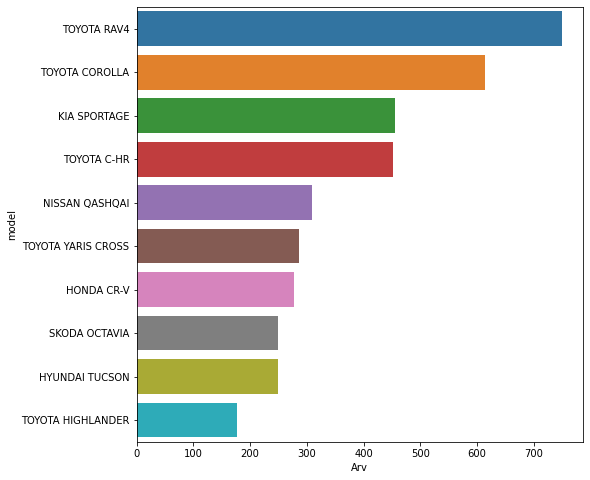

In [136]:
df_hybrids = df[df['Mootori tüüp'].apply(lambda x: 'HYBRIID' in x)]

group_sort_and_plot(df_hybrids, ['model'])

                                           full model  Arv
1       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  703
2     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  523
3        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  408
4      KIA SPORTAGE(BENSIIN_HYBRIID, 1.6 cm3, 132 kW)  318
5   TOYOTA YARIS CROSS(BENSIIN_HYBRIID, 1.5 cm3, 6...  287
6        HONDA CR-V(BENSIIN_HYBRIID, 2.0 cm3, 107 kW)  277
7    NISSAN QASHQAI(BENSIIN_HYBRIID, 1.3 cm3, 116 kW)  242
8     SKODA OCTAVIA(BENSIIN_HYBRIID, 1.5 cm3, 110 kW)  178
9   TOYOTA HIGHLANDER(BENSIIN_HYBRIID, 2.5 cm3, 14...  177
10      TOYOTA YARIS(BENSIIN_HYBRIID, 1.5 cm3, 68 kW)  148


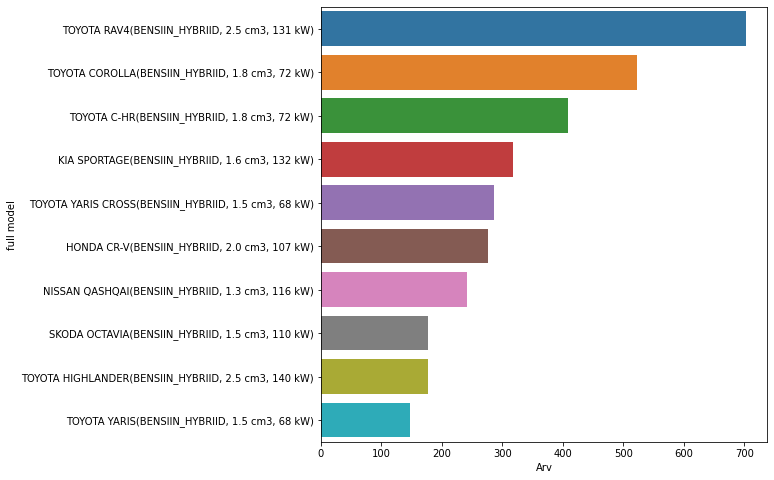

In [137]:
group_sort_and_plot(df_hybrids, ['full model'])

### Top 10 popular electric models

                        model  Arv
1    AUDI E-TRON SPORTBACK 55   45
2              HYUNDAI IONIQ5   43
3              AUDI E-TRON 55   41
4              SKODA ENYAQ 60   37
5              SKODA ENYAQ 80   32
6                  VOLVO XC40   31
7                 RENAULT ZOE   26
8                NISSAN ARIYA   26
9              AUDI E-TRON GT   24
10  CITROEN JUMPY SPACETOURER   20


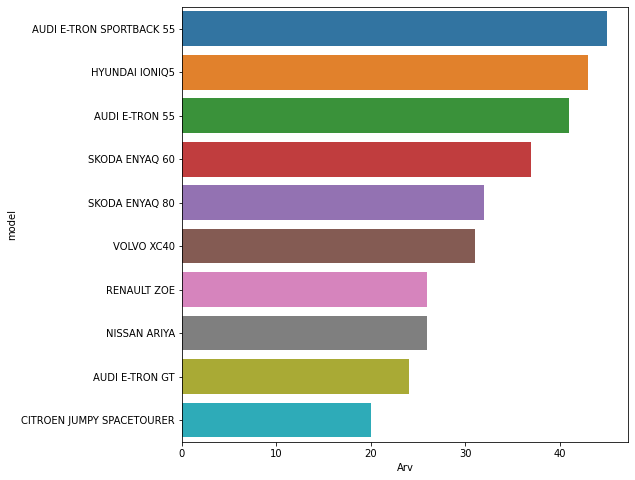

In [138]:
df['Mootori tüüp'].unique()
df_electric = df[df['Mootori tüüp'] == 'ELEKTER']

group_sort_and_plot(df_electric, ['model'])

                                           full model  Arv
1   AUDI E-TRON SPORTBACK 55(ELEKTER, 0.0 cm3, 158...   45
2            AUDI E-TRON 55(ELEKTER, 0.0 cm3, 158 kW)   41
3             SKODA ENYAQ 60(ELEKTER, 0.0 cm3, 70 kW)   37
4             SKODA ENYAQ 80(ELEKTER, 0.0 cm3, 70 kW)   32
5                RENAULT ZOE(ELEKTER, 0.0 cm3, 51 kW)   26
6               NISSAN ARIYA(ELEKTER, 0.0 cm3, 45 kW)   26
7            AUDI E-TRON GT(ELEKTER, 0.0 cm3, 140 kW)   24
8   CITROEN JUMPY SPACETOURER(ELEKTER, 0.0 cm3, 57...   20
9             HYUNDAI IONIQ5(ELEKTER, 0.0 cm3, 53 kW)   19
10            HYUNDAI IONIQ5(ELEKTER, 0.0 cm3, 76 kW)   19


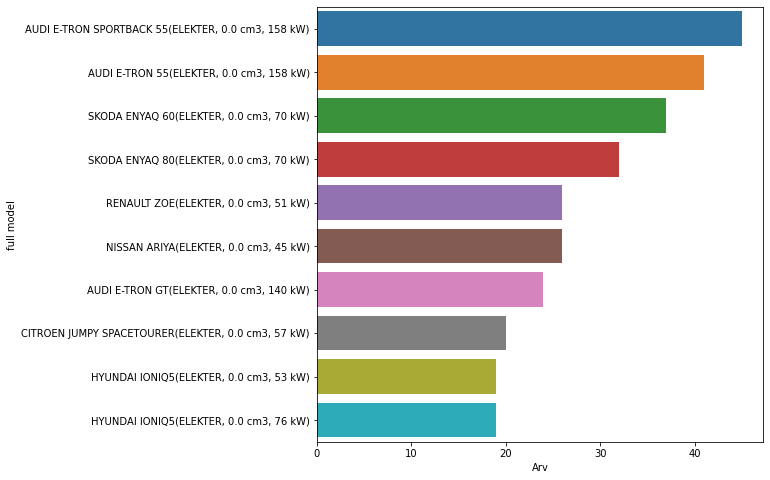

In [139]:
group_sort_and_plot(df_electric, ['full model'])

### Top 10 popular cars by private owners

                 model  Arv
1          TOYOTA RAV4  783
2         KIA SPORTAGE  350
3         SKODA KODIAQ  321
4       TOYOTA COROLLA  301
5   TOYOTA YARIS CROSS  293
6        SKODA OCTAVIA  265
7           HONDA CR-V  210
8             KIA CEED  210
9    VOLKSWAGEN TIGUAN  201
10      HYUNDAI TUCSON  198


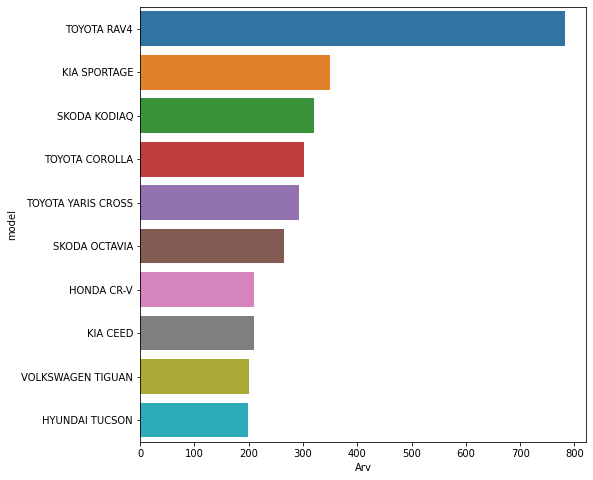

In [140]:
df_private = df[df['Tüüp'].apply(lambda x: 'Füüsiline' in x)]

group_sort_and_plot(df_private, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  426
2       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  338
3        HONDA CR-V(BENSIIN_HYBRIID, 2.0 cm3, 107 kW)  210
4   TOYOTA YARIS CROSS(BENSIIN_HYBRIID, 1.5 cm3, 6...  203
5   SUBARU OUTBACK(BENSIIN_KATALYSAATOR, 2.5 cm3, ...  174
6        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  168
7      KIA SPORTAGE(BENSIIN_HYBRIID, 1.6 cm3, 132 kW)  146
8     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  141
9               SKODA KODIAQ(DIISEL, 2.0 cm3, 110 kW)  139
10  DACIA SANDERO(BENSIIN_KATALYSAATOR, 1.0 cm3, 6...  122


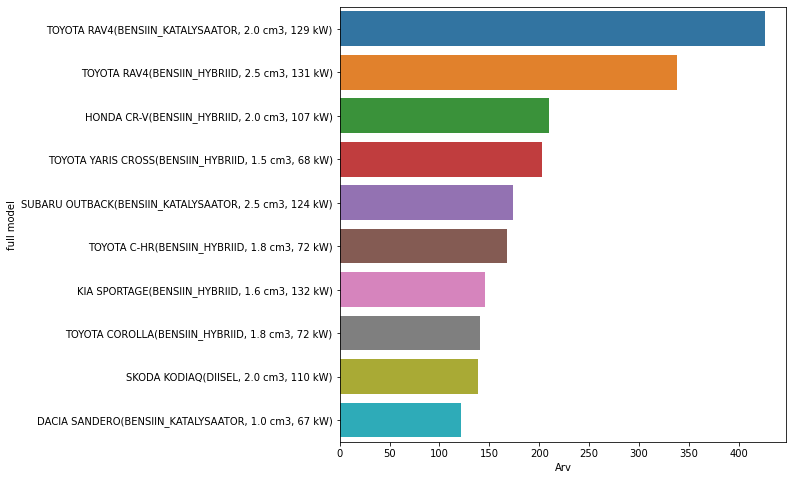

In [141]:
group_sort_and_plot(df_private, ['full model'])

### Top 10 popular cars by company owners

                 model  Arv
1          TOYOTA RAV4  743
2       TOYOTA COROLLA  665
3        SKODA OCTAVIA  542
4         SKODA KODIAQ  370
5             KIA CEED  302
6         KIA SPORTAGE  291
7          TOYOTA C-HR  255
8     VOLKSWAGEN T-ROC  232
9              AUDI Q2  220
10  VOLKSWAGEN T-CROSS  205


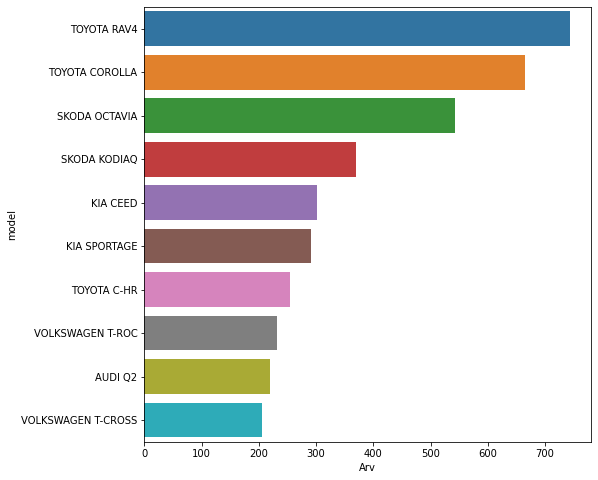

In [142]:
df_corporate = df[df['Tüüp'].apply(lambda x: 'Füüsiline' not in x)]

group_sort_and_plot(df_corporate, ['model'])

                                           full model  Arv
1     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  382
2       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  365
3   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  351
4        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  240
5   VOLKSWAGEN T-ROC(BENSIIN_KATALYSAATOR, 1.5 cm3...  228
6      AUDI Q2(BENSIIN_KATALYSAATOR, 1.5 cm3, 110 kW)  220
7   VOLKSWAGEN T-CROSS(BENSIIN_KATALYSAATOR, 1.0 c...  175
8      KIA SPORTAGE(BENSIIN_HYBRIID, 1.6 cm3, 132 kW)  172
9               SKODA KODIAQ(DIISEL, 2.0 cm3, 110 kW)  143
10  SUBARU OUTBACK(BENSIIN_KATALYSAATOR, 2.5 cm3, ...  140


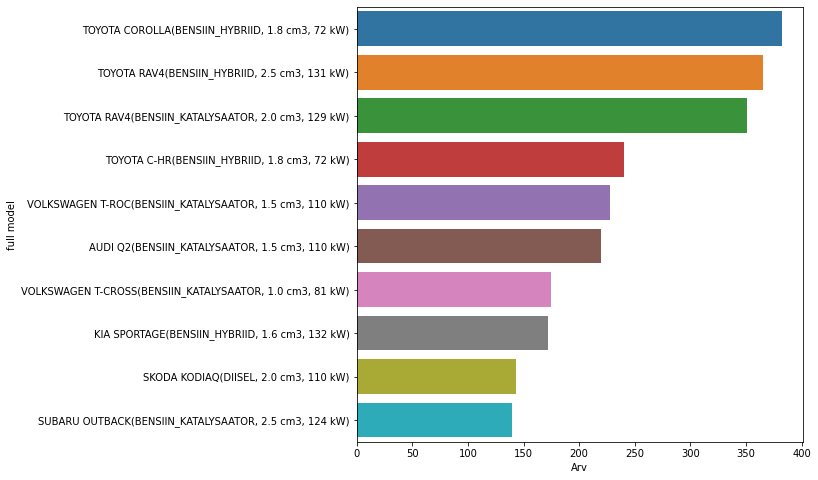

In [143]:
group_sort_and_plot(df_corporate, ['full model'])

### SUV vs non SUV

           SUV    Arv
non-SUV  False  10423
SUV       True  10138


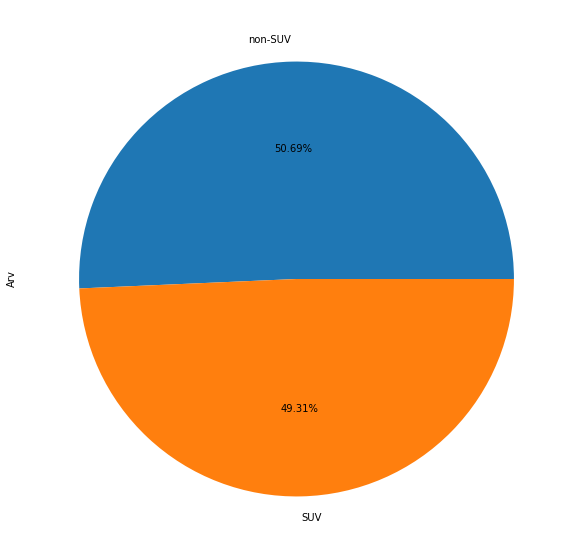

In [144]:
show_pie(df, 'SUV', index=['non-SUV', 'SUV'])

### Popular fuels in SUV

                       Arv
Mootori tüüp              
BENSIIN_KATALYSAATOR  4534
BENSIIN_HYBRIID       3792
DIISEL                1314
DIISEL_HYBRIID         369
ELEKTER                106
CNG                     22
BENSIIN                  1


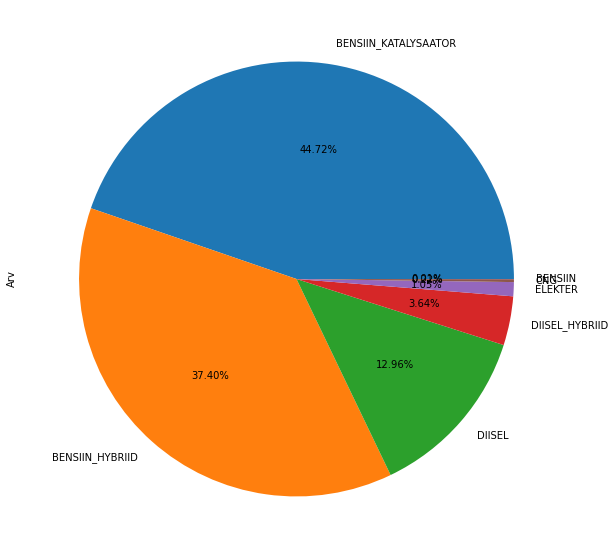

In [145]:
df_suv = df[df['SUV']]

show_pie(df_suv, 'Mootori tüüp')

### Top 10 popular SUV

                 model   Arv
1          TOYOTA RAV4  1526
2         SKODA KODIAQ   691
3         KIA SPORTAGE   641
4   TOYOTA YARIS CROSS   498
5          TOYOTA C-HR   451
6    VOLKSWAGEN TIGUAN   369
7         DACIA DUSTER   347
8   VOLKSWAGEN T-CROSS   339
9       NISSAN QASHQAI   309
10    VOLKSWAGEN T-ROC   301


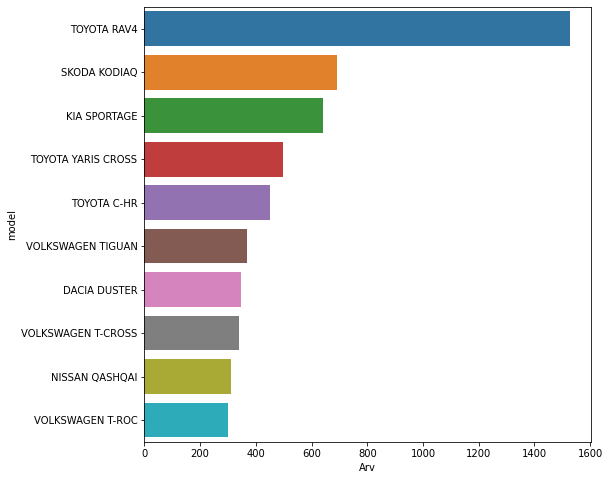

In [146]:
group_sort_and_plot(df_suv, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  777
2       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  703
3        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  408
4      KIA SPORTAGE(BENSIIN_HYBRIID, 1.6 cm3, 132 kW)  318
5   VOLKSWAGEN T-ROC(BENSIIN_KATALYSAATOR, 1.5 cm3...  290
6   TOYOTA YARIS CROSS(BENSIIN_HYBRIID, 1.5 cm3, 6...  287
7               SKODA KODIAQ(DIISEL, 2.0 cm3, 110 kW)  282
8   VOLKSWAGEN T-CROSS(BENSIIN_KATALYSAATOR, 1.0 c...  279
9        HONDA CR-V(BENSIIN_HYBRIID, 2.0 cm3, 107 kW)  277
10   NISSAN QASHQAI(BENSIIN_HYBRIID, 1.3 cm3, 116 kW)  242


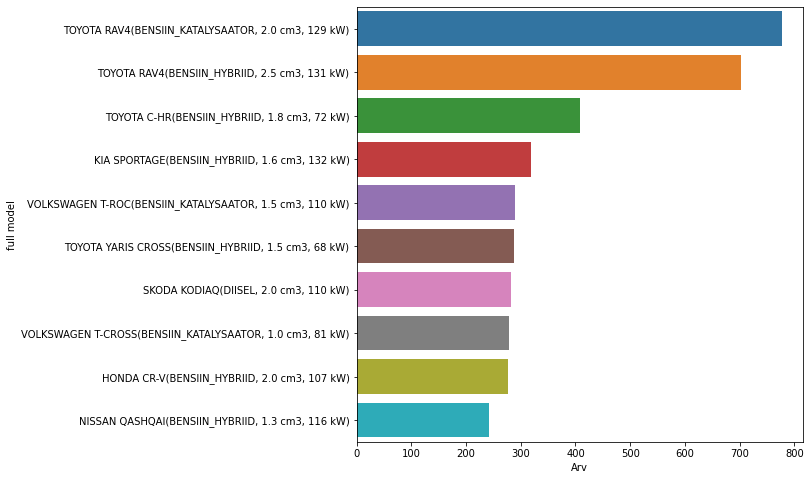

In [147]:
group_sort_and_plot(df_suv, ['full model'])

### Top 10 popular Diesel SUV

                                   model  Arv
1                           SKODA KODIAQ  358
2                           DACIA DUSTER  127
3                           PEUGEOT 5008  123
4                           PEUGEOT 2008   99
5                           PEUGEOT 3008   97
6                      VOLKSWAGEN TIGUAN   93
7                            SKODA KAROQ   51
8                                AUDI Q3   49
9                            KIA SORENTO   30
10  MERCEDES-BENZ GLE 400 D 4MATIC COUPE   29


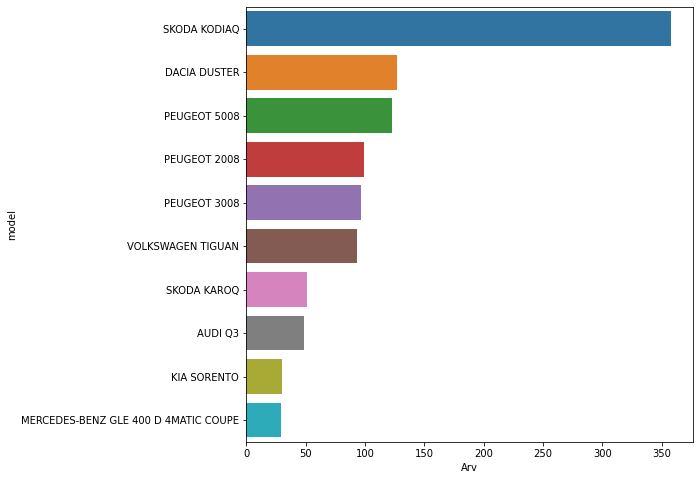

In [148]:
df_diesel_suv = df_diesel[df_diesel['SUV']]

group_sort_and_plot(df_diesel_suv, ['model'])

                                           full model  Arv
1               SKODA KODIAQ(DIISEL, 2.0 cm3, 110 kW)  282
2                PEUGEOT 5008(DIISEL, 1.5 cm3, 96 kW)  110
3                DACIA DUSTER(DIISEL, 1.5 cm3, 84 kW)   99
4                PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)   97
5          VOLKSWAGEN TIGUAN(DIISEL, 2.0 cm3, 110 kW)   80
6               SKODA KODIAQ(DIISEL, 2.0 cm3, 147 kW)   76
7                PEUGEOT 2008(DIISEL, 1.5 cm3, 96 kW)   73
8                    AUDI Q3(DIISEL, 2.0 cm3, 110 kW)   49
9   MERCEDES-BENZ GLE 400 D 4MATIC COUPE(DIISEL, 2...   29
10                SKODA KAROQ(DIISEL, 2.0 cm3, 85 kW)   28


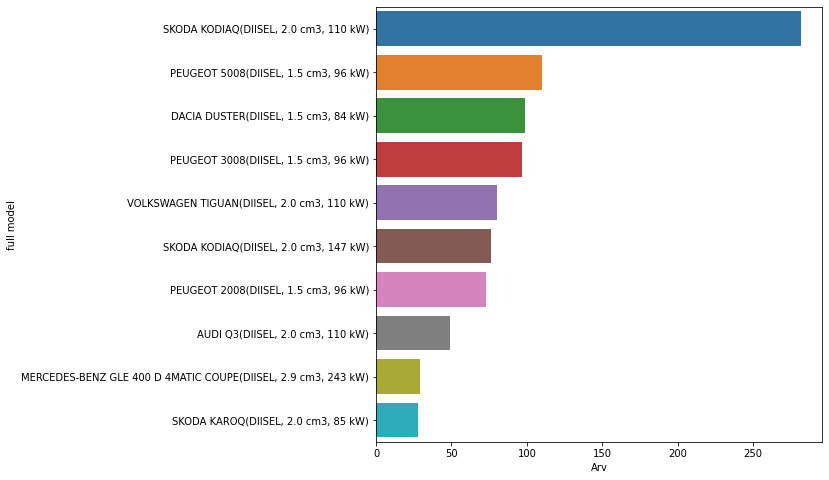

In [149]:
group_sort_and_plot(df_diesel_suv, ['full model'])

### Top 10 popular Petrol SUV

                 model  Arv
1          TOYOTA RAV4  777
2   VOLKSWAGEN T-CROSS  339
3         SKODA KODIAQ  333
4     VOLKSWAGEN T-ROC  294
5    VOLKSWAGEN TIGUAN  249
6              AUDI Q2  227
7         DACIA DUSTER  220
8          SKODA KAROQ  212
9   TOYOTA YARIS CROSS  211
10        KIA SPORTAGE  173


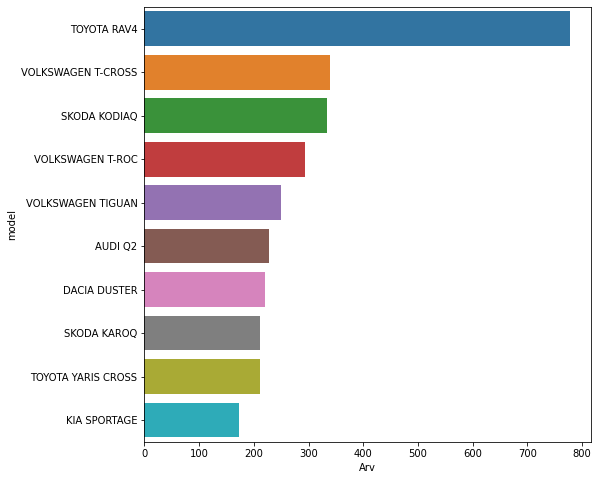

In [150]:
df_petrol_suv = df_petrol[df_petrol['SUV']]

group_sort_and_plot(df_petrol_suv, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  777
2   VOLKSWAGEN T-ROC(BENSIIN_KATALYSAATOR, 1.5 cm3...  290
3   VOLKSWAGEN T-CROSS(BENSIIN_KATALYSAATOR, 1.0 c...  279
4      AUDI Q2(BENSIIN_KATALYSAATOR, 1.5 cm3, 110 kW)  227
5   TOYOTA YARIS CROSS(BENSIIN_KATALYSAATOR, 1.5 c...  211
6   SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...  196
7   VOLKSWAGEN TIGUAN(BENSIIN_KATALYSAATOR, 1.5 cm...  190
8   SKODA KODIAQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 11...  150
9   SKODA KODIAQ(BENSIIN_KATALYSAATOR, 2.0 cm3, 14...  135
10  DACIA DUSTER(BENSIIN_KATALYSAATOR, 1.0 cm3, 67...  115


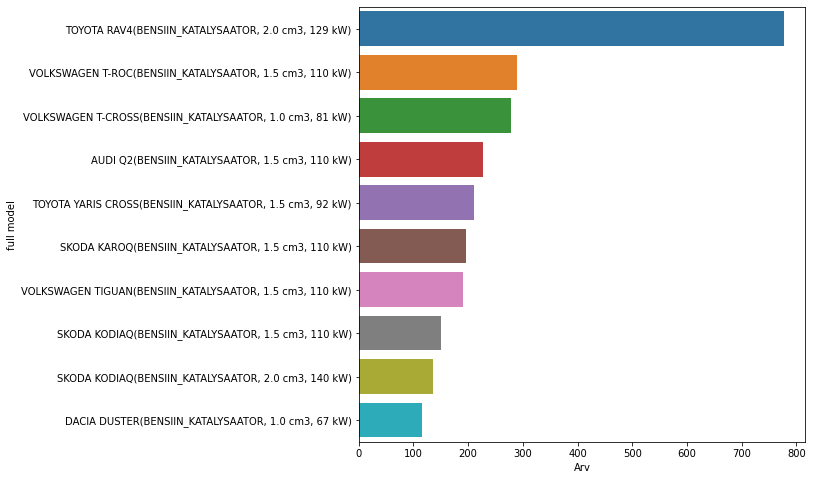

In [151]:
group_sort_and_plot(df_petrol_suv, ['full model'])

### Top 10 popular hybrid SUV

                 model  Arv
1          TOYOTA RAV4  749
2         KIA SPORTAGE  456
3          TOYOTA C-HR  451
4       NISSAN QASHQAI  309
5   TOYOTA YARIS CROSS  287
6           HONDA CR-V  277
7       HYUNDAI TUCSON  249
8           VOLVO XC90  173
9           HONDA HR-V  110
10       SUZUKI VITARA  103


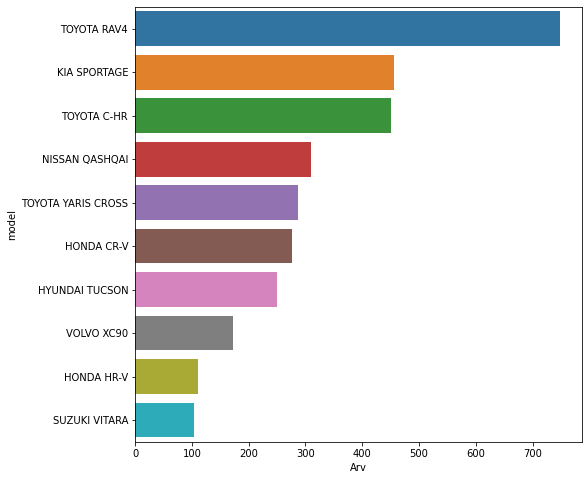

In [152]:
df_hybrid_suv = df_hybrids[df_hybrids['SUV']]

group_sort_and_plot(df_hybrid_suv, ['model'])

                                           full model  Arv
1       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  703
2        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  408
3      KIA SPORTAGE(BENSIIN_HYBRIID, 1.6 cm3, 132 kW)  318
4   TOYOTA YARIS CROSS(BENSIIN_HYBRIID, 1.5 cm3, 6...  287
5        HONDA CR-V(BENSIIN_HYBRIID, 2.0 cm3, 107 kW)  277
6    NISSAN QASHQAI(BENSIIN_HYBRIID, 1.3 cm3, 116 kW)  242
7         VOLVO XC90(DIISEL_HYBRIID, 2.0 cm3, 173 kW)  121
8    HYUNDAI TUCSON(BENSIIN_HYBRIID, 1.6 cm3, 110 kW)  118
9         HONDA HR-V(BENSIIN_HYBRIID, 1.5 cm3, 79 kW)  110
10   HYUNDAI TUCSON(BENSIIN_HYBRIID, 1.6 cm3, 132 kW)   98


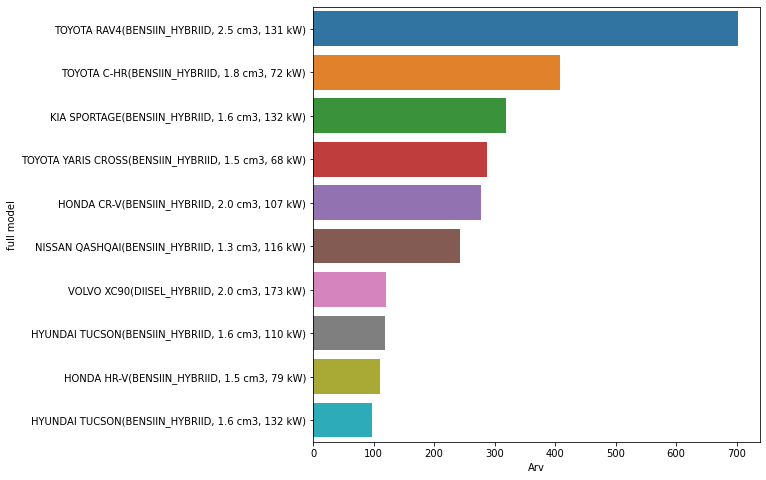

In [153]:
group_sort_and_plot(df_hybrid_suv, ['full model'])

### Most popular models per city

In [154]:
# Popular car per each city
data = df
data.replace('Narva- Jõesuu','Narva-Jõesuu', inplace=True)
cities = data['Linn'].tolist()

cities = set([city if "linn" in city else city + " linn" for city in cities])

for city in sorted(cities):
    print()
    print(city)
    group_sort_and_plot(data[data['Linn'] == city], ['full model'], limit=3, plot=False)


Haapsalu linn
                                          full model  Arv
1  SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...    6
2  PEUGEOT 308(BENSIIN_KATALYSAATOR, 1.2 cm3, 96 kW)    3
3               PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)    3

Keila linn
                                          full model  Arv
1  TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...    5
2  SUBARU OUTBACK(BENSIIN_KATALYSAATOR, 2.5 cm3, ...    4
3       HONDA CR-V(BENSIIN_HYBRIID, 2.0 cm3, 107 kW)    4

Kohtla-Järve linn
                                          full model  Arv
1      TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)    9
2  TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...    8
3  DACIA SANDERO(BENSIIN_KATALYSAATOR, 1.0 cm3, 6...    5

Loksa linn
                                         full model  Arv
1  TOYOTA PROACE CITY VERSO(DIISEL, 1.5 cm3, 96 kW)    2
2     TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)    2
3         HYUNDAI SANTA FE(DIISEL, 2.2 cm3, 142 kW)    1

Maardu linn
     

/tmp/ipykernel_228467/1520971205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace('Narva- Jõesuu','Narva-Jõesuu', inplace=True)


# Top 3 for each mark

In [155]:
marks = ['ALFA ROMEO', 'ALPINE', 'ASTON MARTIN', 
         'AUDI', 'BENTLEY', 'BMW', 'BMW I', 
         'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 
         'DACIA', 'DODGE', 'DS', 'FERRARI', 'FIAT', 'FORD', 
         'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 
         'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LOTUS', 'MASERATI', 
         'MAZDA', 'MERCEDES-AMG', 'MERCEDES-BENZ', 'MINI', 
         'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT', 
         'PORSCHE', 'RENAULT', 'SEAT', 'SKODA', 'SSANGYONG', 
         'SUBARU', 'SUZUKI', 'TESLA MOTORS', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO']

for mark in marks:
    models = df[df['Mark'] == mark]
    if not models.empty:
        print("Top 3 {} models".format(mark))
        group_sort_and_plot(models, ['model'], limit=3, plot=False)
        print()


Top 3 ALFA ROMEO models
                model  Arv
1  ALFA ROMEO STELVIO    7
2   ALFA ROMEO TONALE    7
3   ALFA ROMEO GIULIA    1

Top 3 ASTON MARTIN models
                             model  Arv
1                 ASTON MARTIN DBX    1
2              ASTON MARTIN DBX707    1
3  ASTON MARTIN VANTAGE F1 EDITION    1

Top 3 AUDI models
               model  Arv
1            AUDI Q2  228
2  AUDI Q3 SPORTBACK  145
3            AUDI Q3   96

Top 3 BENTLEY models
                          model  Arv
1           BENTLEY BENTAYGA V8   11
2  BENTLEY CONTINENTAL GT SPEED    3
3       BENTLEY BENTAYGA HYBRID    2

Top 3 BMW models
              model  Arv
1  BMW X5 XDRIVE30D  102
2          BMW 118I   38
3          BMW 318I   38

Top 3 CADILLAC models
               model  Arv
1       CADILLAC XT4   11
2  CADILLAC ESCALADE    6

Top 3 CHEVROLET models
                model  Arv
1  CHEVROLET CORVETTE    1
2  CHEVROLET SUBURBAN    1
3     CHEVROLET TAHOE    1

Top 3 CHRYSLER models
              